# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [5]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [9]:
from sklearn.model_selection import train_test_split

# Separating the features (X) and target variable (y)
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Spliting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Displaying the result
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (404, 13)
Test set size: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generating predictions on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Displaying the predictions
print("Training predictions:\n", y_train_pred[:10])
print("\nTesting predictions:\n", y_test_pred[:10])

Training predictions:
 [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116  25.24677946
 20.77024774 23.90932632  7.81713319 19.60988098]

Testing predictions:
 [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597]


## 3. Calculate and print R-squared for both the training and the testing set.

In [13]:
from sklearn.metrics import r2_score

# Calculating R-squared for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Printing the results
print(f"R-squared (Training): {r2_train:.4f}")
print(f"R-squared (Testing): {r2_test:.4f}")

R-squared (Training): 0.7509
R-squared (Testing): 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [15]:
from sklearn.metrics import mean_squared_error

# Calculating MSE for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the results
print(f"Mean Squared Error (Training): {mse_train:.4f}")
print(f"Mean Squared Error (Testing): {mse_test:.4f}")


Mean Squared Error (Training): 21.6414
Mean Squared Error (Testing): 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [17]:
from sklearn.metrics import mean_absolute_error

# Calculating MAE for training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Printing the results
print(f"Mean Absolute Error (Training): {mae_train:.4f}")
print(f"Mean Absolute Error (Testing): {mae_test:.4f}")

Mean Absolute Error (Training): 3.3148
Mean Absolute Error (Testing): 3.1891


## Classification Model Evaluation

In [19]:
from sklearn.datasets import load_iris
data = load_iris()

In [21]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [23]:
column_names = data.feature_names

In [25]:
df = pd.DataFrame(data['data'],columns=column_names)

In [27]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
target = pd.DataFrame(data.target)

In [31]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [39]:
# Adding the target (class) column explicitly
df['class'] = data.target

# Definining features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Spliting into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Displaying the results
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (120, 4)
Testing set size: (30, 4)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [43]:
from sklearn.linear_model import LogisticRegression

# Initializing and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Generating predictions for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Displaying results
print("✅ Training predictions (first 10):", y_train_pred[:10])
print("✅ Testing predictions (first 10):", y_test_pred[:10])

✅ Training predictions (first 10): [0 1 1 0 1 2 1 2 2 2]
✅ Testing predictions (first 10): [0 2 1 1 0 1 0 0 2 1]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [45]:
from sklearn.metrics import accuracy_score

# Calculating accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

Training Accuracy: 0.9750
Testing Accuracy:  0.9667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [49]:
from sklearn.metrics import balanced_accuracy_score

# Calculating balanced accuracy for training and testing sets
train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

# Printing results
print(f"Balanced Accuracy (Training): {train_balanced_acc:.4f}")
print(f"Balanced Accuracy (Testing):  {test_balanced_acc:.4f}")


Balanced Accuracy (Training): 0.9750
Balanced Accuracy (Testing):  0.9667


## 10. Calculate and print the precision score for both the training and the testing set.

In [51]:
from sklearn.metrics import precision_score

# Calculating precision for training and testing sets
train_precision = precision_score(y_train, y_train_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')

# Printing the results
print(f"Precision (Training): {train_precision:.4f}")
print(f"Precision (Testing):  {test_precision:.4f}")

Precision (Training): 0.9752
Precision (Testing):  0.9697


## 11. Calculate and print the recall score for both the training and the testing set.

In [53]:
from sklearn.metrics import recall_score

# Calculating recall for training and testing sets
train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')

# Printing the results
print(f"Recall (Training): {train_recall:.4f}")
print(f"Recall (Testing):  {test_recall:.4f}")

Recall (Training): 0.9750
Recall (Testing):  0.9667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [55]:
from sklearn.metrics import f1_score

# Calculating F1 score for training and testing sets
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Printing the results
print(f"F1 Score (Training): {train_f1:.4f}")
print(f"F1 Score (Testing):  {test_f1:.4f}")

F1 Score (Training): 0.9750
F1 Score (Testing):  0.9666


## 13. Generate confusion matrices for both the training and the testing set.

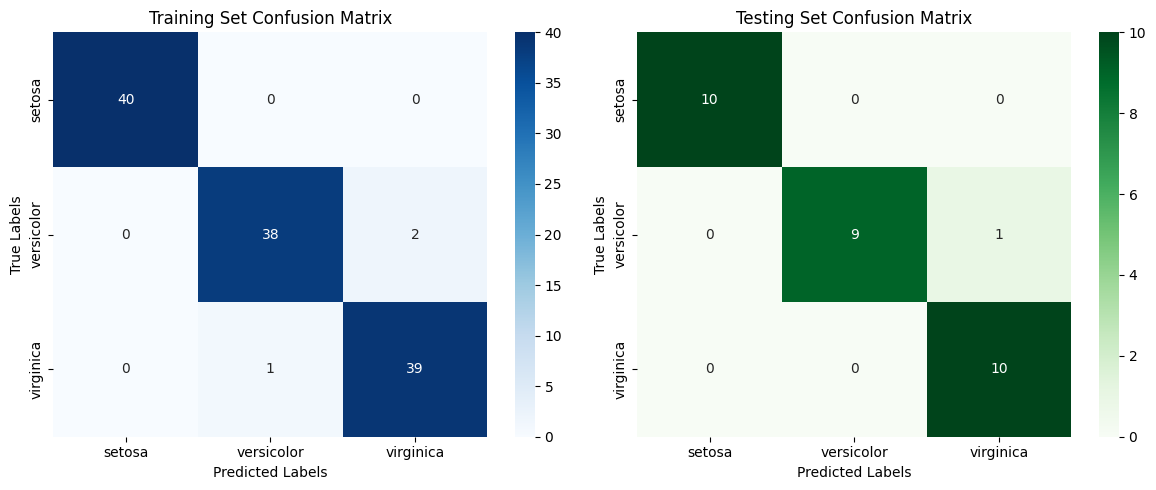

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Computing confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Displaying the matrices as heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=data.target_names, yticklabels=data.target_names)
axes[0].set_title("Training Set Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=data.target_names, yticklabels=data.target_names)
axes[1].set_title("Testing Set Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !